In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [4]:
X, y = load_breast_cancer(return_X_y=True)
print('X.shape=', X.shape)
print('Y.shape=',y.shape)
print('*'*20)
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.30,
    random_state=0
)

for name, arr in zip(['X_train','X_test','y_train','y_test'],[X_train, X_test, y_train, y_test]):
  print(f'{name}: {arr.shape}')

X.shape= (569, 30)
Y.shape= (569,)
********************
X_train: (398, 30)
X_test: (171, 30)
y_train: (398,)
y_test: (171,)


In [5]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier())
])

param_grid = {
    'mlp__solver':['adam', 'sgd'],
    'mlp__alpha': [1e-4, 1e-3, 1e-2],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__max_iter': [500]
}

search = GridSearchCV(
    estimator=pipeline,
    param_grid= param_grid,
    verbose=True
)

search.fit(X_train,y_train)
print('Test score:', round(search.score(X_test, y_test),3))
print('Train score', round(search.score(X_train, y_train),3))


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Test score: 0.965
Train score 0.997


In [14]:
best_model = search.best_estimator_.named_steps['mlp']
losses = best_model.loss_curve_


Text(0.5, 1.0, 'Loss curve for best model')

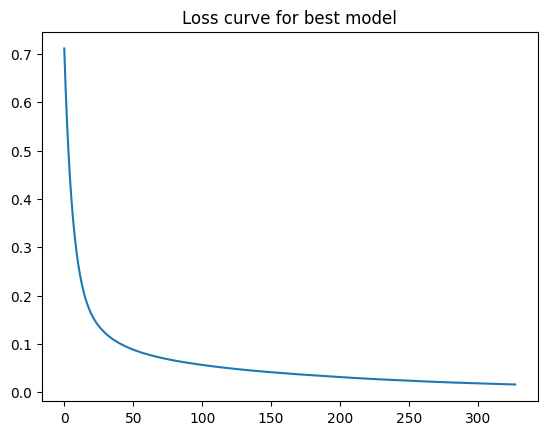

In [16]:
plt.plot(losses)
plt.title('Loss curve for best model')

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

[[ 61   2]
 [  4 104]]


Text(50.722222222222214, 0.5, 'True')

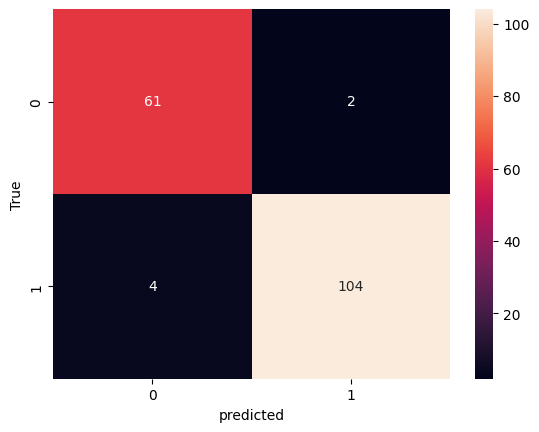

In [22]:
y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

print(cm)

sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('True')




In [31]:

results = pd.DataFrame(search.cv_results_)
# Сортуємо за рангом
results = results.sort_values('rank_test_score')
